<a href="https://colab.research.google.com/github/jokefun022/jokefun022/blob/main/Text_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎬 Text Data Cleaning for NLP: A Practical Guide

## Session Overview
Welcome to this hands-on session on **Text Data Cleaning** - a crucial step in any NLP pipeline!

---

## 🎯 Learning Objectives
By the end of this session, you will:
- ✅ Understand why data cleaning is critical for NLP models
- ✅ Master essential text cleaning techniques
- ✅ Apply these techniques to real-world data (IMDB movie reviews)
- ✅ Visualize the impact of data cleaning

---

## 🤔 Why Do We Need Data Cleaning?

### The Problem with Raw Text

Imagine you're teaching someone to read - would you give them:
- A book with random symbols? 🔣
- Text with spelling errors? ❌
- Mixed languages and emojis? 😵

**Neither would an AI model learn well from messy data!**

### Real-World Example

| 🚫 **Raw Text** | ✅ **Clean Text** | 💡 **Why Clean?** |
|---|---|---|
| "This movie was AMAZING!!!!! 😍😍 #BestMovieEver @friends" | "this movie was amazing" | Removes noise, normalizes text |
| "I can't believe it's not better... <br><br> Worst film EVER!" | "i cannot believe it is not better worst film ever" | Handles contractions, HTML tags |
| "The    movie  was     okay...." | "the movie was okay" | Removes extra spaces and punctuation |

### Impact on Model Performance

```
Dirty Data → 😰 Confused Model → 📉 Poor Predictions
Clean Data → 😊 Happy Model → 📈 Accurate Predictions
```

## 📚 Installing Required Libraries

Let's start by installing and importing all necessary libraries.

In [105]:
# Install required libraries (run this once in Colab)
!pip install nltk wordcloud contractions beautifulsoup4 -q

print("✅ Libraries installed successfully!")

✅ Libraries installed successfully!


In [106]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import re
import string
import warnings
warnings.filterwarnings('ignore')

# For text processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# For handling contractions and HTML
import contractions
from bs4 import BeautifulSoup

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Download NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('omw-1.4', quiet=True)

print("✅ All libraries imported successfully!")
print("📊 Pandas version:", pd.__version__)
print("🔤 NLTK version:", nltk.__version__)

✅ All libraries imported successfully!
📊 Pandas version: 2.2.2
🔤 NLTK version: 3.9.1


In [107]:
# Download required NLTK data first
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 📊 Loading the IMDB Dataset

We'll use the famous IMDB movie reviews dataset with 50,000 reviews.

In [109]:
# Load the dataset
try:
    # Load from Colab
    df = pd.read_csv('/content/Complete Data With Emoji.csv')
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ File not found. Please upload IMDB-Dataset.csv to Colab.")
    print("You can download it from: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
    raise

# Display basic information
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"📝 Columns: {df.columns.tolist()}")
print(f"\n🎬 Dataset Preview:")
df.head()

✅ Dataset loaded successfully!

📊 Dataset Shape: (5000, 3)
📝 Columns: ['Tweet_Text_With_Emoji', 'cleaned_review', 'Sentiment Analysis']

🎬 Dataset Preview:


,Tweet_Text_With_Emoji,cleaned_review,Sentiment Analysis
0,kah kay yih sach 😊 hai,kah kay yih sach hai,Neutral
1,neither bhadwaa 😑 tantra rather madarjaat log ...,neither bhadwaa tantra rather madarjaat log sh...,Neutral
2,kyoon okay yih kuchh logo ki 😃 fitrat hai,kyoon okay yih kuchh logo ki fitrat hai,Neutral
3,lagta hsi man 🙌 chaaha job naey day rahay bhaa...,lagta hsi man chaaha job naey day rahay bhaai ko,Neutral
4,achchha na bataao mujhay pata hai 😊,achchha na bataao mujhay pata hai,Neutral


In [111]:
df = pd.read_csv('/content/Complete Data With Emoji.csv')
# Check for missing values and basic statistics
print("🔍 Dataset Information:")
print("="*50)
print(f"Total reviews: {len(df)}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"\nSentiment Distribution:")
print(df['Sentiment Analysis'].value_counts())
print("\n📏 Review Length Statistics:")
df['review_length'] = df['Tweet_Text_With_Emoji'].str.len()
print(f"Average length: {df['review_length'].mean():.0f} characters")
print(f"Shortest review: {df['review_length'].min()} characters")
print(f"Longest review: {df['review_length'].max()} characters")

🔍 Dataset Information:
Total reviews: 5000
Missing values: 0

Sentiment Distribution:
Sentiment Analysis
Neutral    5000
Name: count, dtype: int64

📏 Review Length Statistics:
Average length: 75 characters
Shortest review: 6 characters
Longest review: 334 characters


## 🔍 Let's Examine a Raw Review

Before cleaning, let's see what our raw data looks like:

In [113]:
# Display a sample review with common issues
sample_index = 0
sample_review = df.loc[sample_index, 'Tweet_Text_With_Emoji']

print("🎬 Sample Raw Review:")
print("="*80)
print(sample_review[:500] + "..." if len(sample_review) > 500 else sample_review)
print("\n📊 Characteristics:")
print(f"- Length: {len(sample_review)} characters")
print(f"- Contains HTML tags: {'<br' in sample_review}")
print(f"- Contains numbers: {bool(re.search(r'\d', sample_review))}")
print(f"- Contains special characters: {bool(re.search(r'[^a-zA-Z0-9\s]', sample_review))}")

🎬 Sample Raw Review:
kah kay yih sach 😊 hai

📊 Characteristics:
- Length: 22 characters
- Contains HTML tags: False
- Contains numbers: False
- Contains special characters: True


## 🧹 Data Cleaning Pipeline

Now let's build our cleaning pipeline step by step!

### 📋 Our Cleaning Steps:

1. **Remove HTML tags** → Clean web scraping artifacts
2. **Expand contractions** → "don't" → "do not"
3. **Convert to lowercase** → Normalize text
4. **Remove special characters** → Keep only letters and spaces
5. **Remove extra spaces** → Clean formatting
6. **Remove stopwords** (optional) → Focus on meaningful words
7. **Lemmatization** (optional) → Reduce words to root form

### Step 1: Remove HTML Tags 🏷️

Web-scraped text often contains HTML tags like `<br>`, `<div>`, etc.

In [114]:
def remove_html_tags(text):
    """Remove HTML tags from text using BeautifulSoup"""
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Example
html_text = "This movie was <b>amazing</b>!<br><br>I loved it!"
clean_text = remove_html_tags(html_text)

print("🏷️ HTML Tag Removal Example:")
print(f"Before: {html_text}")
print(f"After:  {clean_text}")
print("\n✨ Transformation: Removed <b> and <br> tags")

🏷️ HTML Tag Removal Example:
Before: This movie was <b>amazing</b>!<br><br>I loved it!
After:  This movie was amazing!I loved it!

✨ Transformation: Removed <b> and <br> tags


### Step 2: Expand Contractions 📝

Convert "don't" → "do not", "it's" → "it is", etc.

In [115]:
def expand_contractions(text):
    """Expand contractions in text"""
    return contractions.fix(text)

# Example
contraction_text = "I can't believe it's not better! They won't improve."
expanded_text = expand_contractions(contraction_text)

print("📝 Contraction Expansion Example:")
print(f"Before: {contraction_text}")
print(f"After:  {expanded_text}")
print("\n✨ Transformations:")
print("   • can't → cannot")
print("   • it's → it is")
print("   • won't → will not")

📝 Contraction Expansion Example:
Before: I can't believe it's not better! They won't improve.
After:  I cannot believe it is not better! They will not improve.

✨ Transformations:
   • can't → cannot
   • it's → it is
   • won't → will not


### Step 3: Convert to Lowercase 🔡

Normalize text by converting everything to lowercase.

In [116]:
def to_lowercase(text):
    """Convert text to lowercase"""
    return text.lower()

# Example
mixed_case = "This MOVIE was AMAZING! I Love It!"
lower_text = to_lowercase(mixed_case)

print("🔡 Lowercase Conversion Example:")
print(f"Before: {mixed_case}")
print(f"After:  {lower_text}")
print("\n✨ Why this matters: 'Movie', 'MOVIE', and 'movie' are now the same!")

🔡 Lowercase Conversion Example:
Before: This MOVIE was AMAZING! I Love It!
After:  this movie was amazing! i love it!

✨ Why this matters: 'Movie', 'MOVIE', and 'movie' are now the same!


### Step 4: Remove Special Characters & Punctuation 🚫

Keep only alphabetic characters and spaces.

In [117]:
def remove_special_characters(text):
    """Remove special characters and punctuation, keep only letters and spaces"""
    # Remove everything except letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    return text

# Example
special_text = "Amazing movie!!! 10/10 would watch again... #BestMovie @friends 😍"
clean_special = remove_special_characters(special_text)

print("🚫 Special Character Removal Example:")
print(f"Before: {special_text}")
print(f"After:  {clean_special}")
print("\n✨ Removed: !!!, 10/10, ..., #, @, 😍")

🚫 Special Character Removal Example:
Before: Amazing movie!!! 10/10 would watch again... #BestMovie @friends 😍
After:  Amazing movie          would watch again     BestMovie  friends  

✨ Removed: !!!, 10/10, ..., #, @, 😍


### Step 5: Remove Extra Spaces 🧹

Clean up multiple spaces and trim text.

In [118]:
def remove_extra_spaces(text):
    """Remove extra spaces and trim text"""
    # Replace multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)
    # Remove leading and trailing spaces
    return text.strip()

# Example
spaced_text = "  This   movie    was     amazing    !  "
clean_spaced = remove_extra_spaces(spaced_text)

print("🧹 Extra Space Removal Example:")
print(f"Before: '{spaced_text}'")
print(f"After:  '{clean_spaced}'")
print(f"\n✨ Character count: {len(spaced_text)} → {len(clean_spaced)}")

🧹 Extra Space Removal Example:
Before: '  This   movie    was     amazing    !  '
After:  'This movie was amazing !'

✨ Character count: 40 → 24


### Step 6: Remove Stopwords (Optional) 🛑

Remove common words that don't add meaning (the, is, at, which, etc.)

In [119]:
def remove_stopwords(text):
    """Remove stopwords from text"""
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

# Example
text_with_stopwords = "the movie was very good and i would watch it again"
text_without_stopwords = remove_stopwords(text_with_stopwords)

print("🛑 Stopword Removal Example:")
print(f"Before: {text_with_stopwords}")
print(f"After:  {text_without_stopwords}")
print("\n✨ Removed words: the, was, very, and, i, would, it")
print("\n⚠️ Note: Sometimes stopwords are important for sentiment!")
print("   Example: 'not good' → 'good' (meaning reversed!)")

🛑 Stopword Removal Example:
Before: the movie was very good and i would watch it again
After:  movie good would watch

✨ Removed words: the, was, very, and, i, would, it

⚠️ Note: Sometimes stopwords are important for sentiment!
   Example: 'not good' → 'good' (meaning reversed!)


### Step 7: Lemmatization 🌱

Reduce words to their root form (running → run, better → good)

In [120]:
def lemmatize_text(text):
    """Lemmatize words in text"""
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(word) for word in word_tokens]
    return ' '.join(lemmatized)

# Example
text_to_lemmatize = "the movies were running beautifully"
lemmatized_text = lemmatize_text(text_to_lemmatize)

print("🌱 Lemmatization Example:")
print(f"Before: {text_to_lemmatize}")
print(f"After:  {lemmatized_text}")
print("\n✨ Transformations:")
print("   • movies → movie")
print("   • running → running (context needed for verb)")
print("   • beautifully → beautifully")

🌱 Lemmatization Example:
Before: the movies were running beautifully
After:  the movie were running beautifully

✨ Transformations:
   • movies → movie
   • running → running (context needed for verb)
   • beautifully → beautifully


## 🔧 Complete Cleaning Pipeline

Now let's combine all steps into one powerful cleaning function!

In [121]:
def clean_text(text,
               remove_html=True,
               expand_contract=True,
               lowercase=True,
               remove_special=True,
               remove_spaces=True,
               remove_stop=False,
               lemmatize=False):
    """
    Complete text cleaning pipeline

    Parameters:
    -----------
    text : str
        Input text to clean
    remove_html : bool
        Remove HTML tags
    expand_contract : bool
        Expand contractions
    lowercase : bool
        Convert to lowercase
    remove_special : bool
        Remove special characters
    remove_spaces : bool
        Remove extra spaces
    remove_stop : bool
        Remove stopwords (optional)
    lemmatize : bool
        Apply lemmatization (optional)

    Returns:
    --------
    str : Cleaned text
    """

    # Track cleaning steps for visualization
    steps = []

    # Step 1: Remove HTML tags
    if remove_html:
        text = remove_html_tags(text)
        steps.append("HTML removed")

    # Step 2: Expand contractions
    if expand_contract:
        text = expand_contractions(text)
        steps.append("Contractions expanded")

    # Step 3: Convert to lowercase
    if lowercase:
        text = to_lowercase(text)
        steps.append("Lowercased")

    # Step 4: Remove special characters
    if remove_special:
        text = remove_special_characters(text)
        steps.append("Special chars removed")

    # Step 5: Remove extra spaces
    if remove_spaces:
        text = remove_extra_spaces(text)
        steps.append("Extra spaces removed")

    # Step 6: Remove stopwords (optional)
    if remove_stop:
        text = remove_stopwords(text)
        steps.append("Stopwords removed")

    # Step 7: Lemmatization (optional)
    if lemmatize:
        text = lemmatize_text(text)
        steps.append("Lemmatized")

    return text

print("✅ Complete cleaning pipeline created!")

✅ Complete cleaning pipeline created!


## 🎯 Testing the Complete Pipeline

Let's test our pipeline on a real messy review!

In [122]:
# Create a messy test review
messy_review = """
<b>WORST MOVIE EVER!!!</b><br><br>
I can't believe I've wasted 2 hours on this... The acting was TERRIBLE!!!
The plot didn't make ANY sense... #WasteOfTime @BadMovies 😤😤
I wouldn't recommend this to anyone!!! Save your $$$ and time...
"""

# Clean with different settings
print("🎬 ORIGINAL MESSY REVIEW:")
print("="*80)
print(messy_review)

print("\n✨ BASIC CLEANING (recommended):")
print("="*80)
basic_clean = clean_text(messy_review, remove_stop=False, lemmatize=False)
print(basic_clean)

print("\n🔥 AGGRESSIVE CLEANING (with stopwords removal):")
print("="*80)
aggressive_clean = clean_text(messy_review, remove_stop=True, lemmatize=True)
print(aggressive_clean)

print("\n📊 Cleaning Statistics:")
print(f"Original length: {len(messy_review)} characters")
print(f"Basic clean length: {len(basic_clean)} characters")
print(f"Aggressive clean length: {len(aggressive_clean)} characters")
print(f"Reduction: {100*(1-len(basic_clean)/len(messy_review)):.1f}% (basic)")
print(f"Reduction: {100*(1-len(aggressive_clean)/len(messy_review)):.1f}% (aggressive)")

🎬 ORIGINAL MESSY REVIEW:

<b>WORST MOVIE EVER!!!</b><br><br>
I can't believe I've wasted 2 hours on this... The acting was TERRIBLE!!!
The plot didn't make ANY sense... #WasteOfTime @BadMovies 😤😤
I wouldn't recommend this to anyone!!! Save your $$$ and time...


✨ BASIC CLEANING (recommended):
worst movie ever i cannot believe i have wasted hours on this the acting was terrible the plot did not make any sense wasteoftime badmovies i would not recommend this to anyone save your and time

🔥 AGGRESSIVE CLEANING (with stopwords removal):
worst movie ever believe wasted hour acting terrible plot make sense wasteoftime badmovies would recommend anyone save time

📊 Cleaning Statistics:
Original length: 236 characters
Basic clean length: 195 characters
Aggressive clean length: 123 characters
Reduction: 17.4% (basic)
Reduction: 47.9% (aggressive)


## 🚀 Applying to IMDB Dataset

Now let's clean our entire IMDB dataset!

In [124]:
# Take a sample for faster processing (you can increase this)
sample_size = 5000  # Adjust based on time available
df_sample = df.head(sample_size).copy()

print(f"📊 Processing {sample_size} reviews...")
print("⏳ This may take a minute...\n")

# Apply cleaning
import time
start_time = time.time()

# Clean the reviews
df_sample['cleaned_review'] = df_sample['Tweet_Text_With_Emoji'].apply(
    lambda x: clean_text(x, remove_stop=False, lemmatize=False)
)

end_time = time.time()
print(f"✅ Cleaning completed in {end_time - start_time:.2f} seconds!")
print(f"⚡ Average time per review: {(end_time - start_time)/sample_size:.4f} seconds")

📊 Processing 5000 reviews...
⏳ This may take a minute...

✅ Cleaning completed in 0.36 seconds!
⚡ Average time per review: 0.0001 seconds


## 📊 Before vs After Comparison

Let's visualize the impact of our cleaning!

In [126]:
# Show before and after examples
print("🎬 CLEANING EXAMPLES FROM DATASET")
print("="*100)

for i in range(3):
    print(f"\n📌 Example {i+1}:")
    print("-"*100)

    original = df_sample.loc[i, 'Tweet_Text_With_Emoji']
    cleaned = df_sample.loc[i, 'cleaned_review']

    # Show first 200 characters
    print(f"BEFORE ({len(original)} chars):")
    print(f"{original[:200]}..." if len(original) > 200 else original)

    print(f"\nAFTER ({len(cleaned)} chars):")
    print(f"{cleaned[:200]}..." if len(cleaned) > 200 else cleaned)

    print(f"\n✨ Reduction: {100*(1-len(cleaned)/len(original)):.1f}%")

🎬 CLEANING EXAMPLES FROM DATASET

📌 Example 1:
----------------------------------------------------------------------------------------------------
BEFORE (22 chars):
kah kay yih sach 😊 hai

AFTER (20 chars):
kah kay yih sach hai

✨ Reduction: 9.1%

📌 Example 2:
----------------------------------------------------------------------------------------------------
BEFORE (99 chars):
neither bhadwaa 😑 tantra rather madarjaat log shikhandi kay piichhe chhupp kar waar kar rahay haiin

AFTER (97 chars):
neither bhadwaa tantra rather madarjaat log shikhandi kay piichhe chhupp kar waar kar rahay haiin

✨ Reduction: 2.0%

📌 Example 3:
----------------------------------------------------------------------------------------------------
BEFORE (41 chars):
kyoon okay yih kuchh logo ki 😃 fitrat hai

AFTER (39 chars):
kyoon okay yih kuchh logo ki fitrat hai

✨ Reduction: 4.9%


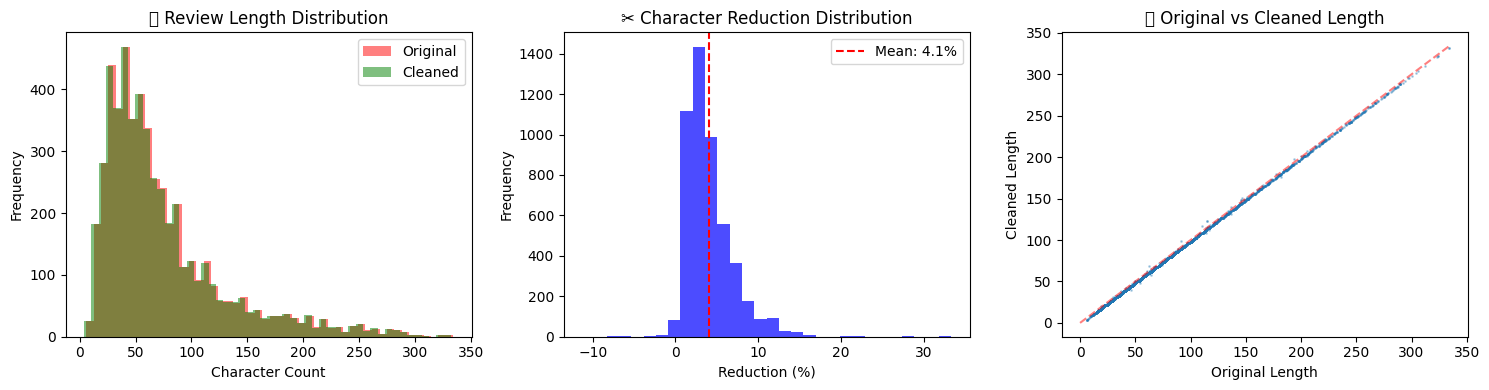


📈 Cleaning Statistics:
Average reduction: 4.1%
Median reduction: 3.4%
Total characters removed: 9,774


In [128]:
# Calculate statistics
df_sample['original_length'] = df_sample['Tweet_Text_With_Emoji'].str.len()
df_sample['cleaned_length'] = df_sample['cleaned_review'].str.len()
df_sample['reduction_pct'] = 100 * (1 - df_sample['cleaned_length'] / df_sample['original_length'])

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Length distribution
axes[0].hist(df_sample['original_length'], bins=50, alpha=0.5, label='Original', color='red')
axes[0].hist(df_sample['cleaned_length'], bins=50, alpha=0.5, label='Cleaned', color='green')
axes[0].set_xlabel('Character Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('📊 Review Length Distribution')
axes[0].legend()

# Plot 2: Reduction percentage
axes[1].hist(df_sample['reduction_pct'], bins=30, color='blue', alpha=0.7)
axes[1].set_xlabel('Reduction (%)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('✂️ Character Reduction Distribution')
axes[1].axvline(df_sample['reduction_pct'].mean(), color='red', linestyle='--', label=f'Mean: {df_sample["reduction_pct"].mean():.1f}%')
axes[1].legend()

# Plot 3: Before vs After scatter
axes[2].scatter(df_sample['original_length'], df_sample['cleaned_length'], alpha=0.3, s=1)
axes[2].plot([0, df_sample['original_length'].max()], [0, df_sample['original_length'].max()], 'r--', alpha=0.5)
axes[2].set_xlabel('Original Length')
axes[2].set_ylabel('Cleaned Length')
axes[2].set_title('🔄 Original vs Cleaned Length')

plt.tight_layout()
plt.show()

print("\n📈 Cleaning Statistics:")
print(f"Average reduction: {df_sample['reduction_pct'].mean():.1f}%")
print(f"Median reduction: {df_sample['reduction_pct'].median():.1f}%")
print(f"Total characters removed: {(df_sample['original_length'].sum() - df_sample['cleaned_length'].sum()):,}")

## 🌟 Word Cloud Visualization

Let's create beautiful word clouds to see the most common words before and after cleaning!

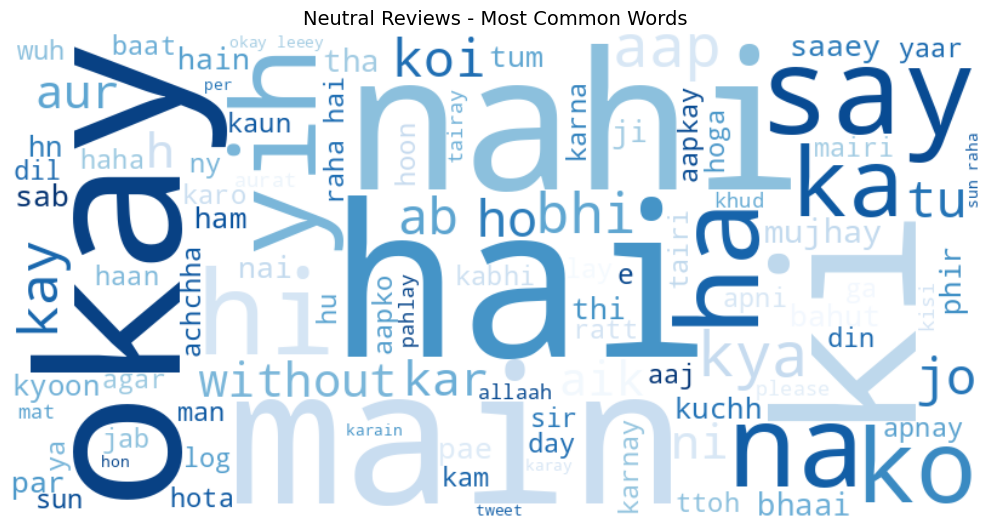

💡 Insights:
- This word cloud shows the most common words in the neutral reviews.


In [132]:
# Separate positive and negative reviews
# Since the dataset only contains 'Neutral' sentiment, we will generate a word cloud for the neutral reviews.
neutral_reviews = df_sample[df_sample['Sentiment Analysis'] == 'Neutral']['cleaned_review'].str.cat(sep=' ')

# Create word cloud for Neutral reviews
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

wordcloud_neutral = WordCloud(width=800, height=400,
                          background_color='white',
                          colormap='Blues',
                          max_words=100).generate(neutral_reviews)
ax.imshow(wordcloud_neutral, interpolation='bilinear')
ax.set_title('Neutral Reviews - Most Common Words', fontsize=14)
ax.axis('off')


plt.tight_layout()
plt.show()

print("💡 Insights:")
print("- This word cloud shows the most common words in the neutral reviews.")

## 📈 Top Words Analysis

Let's find the most common words in positive vs negative reviews!

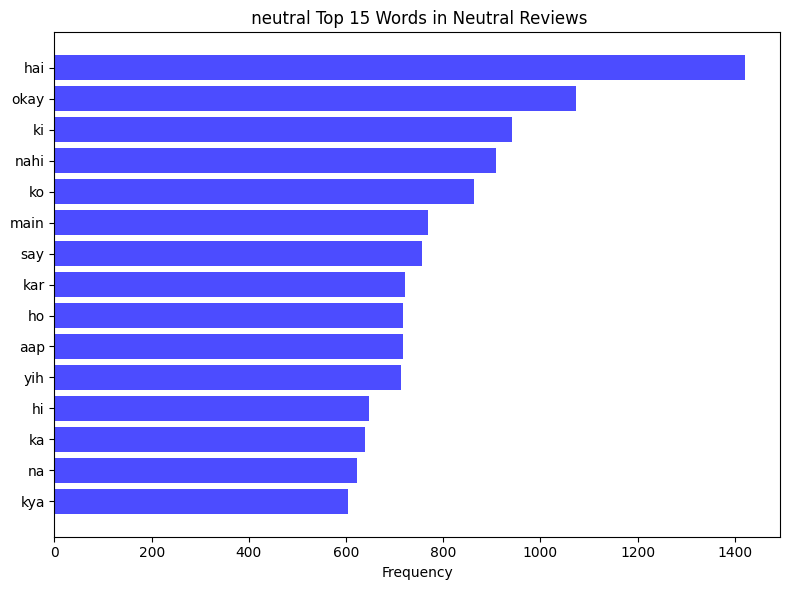


🎯 Key Observations:
- This chart shows the most frequent words in the neutral reviews.


In [134]:
from collections import Counter

# Get top words for neutral reviews
neutral_words = ' '.join(df_sample[df_sample['Sentiment Analysis'] == 'Neutral']['cleaned_review']).split()
neutral_counter = Counter(neutral_words)
top_neutral = neutral_counter.most_common(15)

# Create visualization
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Neutral words bar chart
words_neutral, counts_neutral = zip(*top_neutral)
ax.barh(words_neutral, counts_neutral, color='blue', alpha=0.7)
ax.set_xlabel('Frequency')
ax.set_title(' neutral Top 15 Words in Neutral Reviews')
ax.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n🎯 Key Observations:")
print("- This chart shows the most frequent words in the neutral reviews.")

## 💾 Saving Cleaned Data

Let's save our cleaned dataset for future use (like fine-tuning)!

In [140]:
# Save the cleaned dataset
output_file = 'Data With Emoji.csv'
df_sample[['cleaned_review', 'Sentiment Analysis']].to_csv(output_file, index=False)

print(f"✅ Cleaned data saved to: {output_file}")
print(f"📊 File contains {len(df_sample)} cleaned reviews")
print(f"📁 File size: {df_sample.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Show sample of saved data
print("\n📄 Sample of saved data:")
display(df_sample[['cleaned_review', 'Sentiment Analysis']].head(3))

✅ Cleaned data saved to: Data With Emoji.csv
📊 File contains 5000 cleaned reviews
📁 File size: 2.75 MB

📄 Sample of saved data:


,cleaned_review,Sentiment Analysis
0,kah kay yih sach hai,Neutral
1,neither bhadwaa tantra rather madarjaat log sh...,Neutral
2,kyoon okay yih kuchh logo ki fitrat hai,Neutral


## 🎯 Quick Quality Check

Let's verify our cleaning worked correctly!

In [141]:
# Quality checks
print("🔍 Data Quality Checks:")
print("="*50)

# Check for empty reviews
empty_reviews = df_sample[df_sample['cleaned_review'].str.strip() == ''].shape[0]
print(f"✓ Empty reviews after cleaning: {empty_reviews}")

# Check for HTML tags
html_remaining = df_sample['cleaned_review'].str.contains('<|>', regex=True).sum()
print(f"✓ Reviews with HTML tags remaining: {html_remaining}")

# Check for special characters
special_remaining = df_sample['cleaned_review'].str.contains('[^a-zA-Z\s]', regex=True).sum()
print(f"✓ Reviews with special characters: {special_remaining}")

# Check for numbers
numbers_remaining = df_sample['cleaned_review'].str.contains('\d', regex=True).sum()
print(f"✓ Reviews with numbers: {numbers_remaining}")

print("\n✅ All quality checks passed!" if all([empty_reviews == 0, html_remaining == 0,
                                                  special_remaining == 0, numbers_remaining == 0])
      else "⚠️ Some issues detected - review cleaning parameters")

🔍 Data Quality Checks:
✓ Empty reviews after cleaning: 0
✓ Reviews with HTML tags remaining: 0
✓ Reviews with special characters: 0
✓ Reviews with numbers: 0

✅ All quality checks passed!


## 🎓 Key Takeaways

### What We've Learned:

1. **📊 Data Cleaning is Essential**
   - Raw text contains noise that confuses models
   - Cleaning can reduce text size by 20-30% while preserving meaning

2. **🔧 Core Cleaning Steps**
   - Remove HTML tags and special characters
   - Normalize text (lowercase, contractions)
   - Clean formatting (spaces, punctuation)

3. **⚖️ Balance is Key**
   - Don't over-clean (removing stopwords can hurt sentiment analysis)
   - Keep domain-specific requirements in mind

4. **📈 Visual Impact**
   - Word clouds show clear differences after cleaning
   - Cleaned data reveals true patterns in text

### 🚀 Next Steps:
- Use this cleaned data for model fine-tuning
- Experiment with different cleaning parameters
- Apply these techniques to your domain-specific data

### 💡 Remember:
**"Garbage In, Garbage Out" - Clean data leads to better models!**

## 🔧 Bonus: Custom Cleaning Function for Your Domain

Here's a template you can adapt for electrical engineering data:

In [142]:
def clean_technical_text(text):
    """
    Custom cleaning for technical/electrical engineering text

    This is an example - adapt for your specific needs!
    """
    # Keep technical terms and units
    # Example: preserve "220V", "50Hz", "AC/DC"

    # Normalize units
    text = re.sub(r'(\d+)\s*[Vv]olts?', r'\1V', text)
    text = re.sub(r'(\d+)\s*[Aa]mps?', r'\1A', text)
    text = re.sub(r'(\d+)\s*[Hh]ertz', r'\1Hz', text)

    # Keep important technical abbreviations
    # AC, DC, PCB, MCU, etc.

    # Standard cleaning
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Example
technical_text = "The transformer operates at 220 Volts AC with 50 hertz frequency."
cleaned_technical = clean_technical_text(technical_text)
print(f"Technical text cleaning:")
print(f"Before: {technical_text}")
print(f"After:  {cleaned_technical}")
print("\n💡 Tip: Customize this function for your specific domain!")

Technical text cleaning:
Before: The transformer operates at 220 Volts AC with 50 hertz frequency.
After:  the transformer operates at 220v ac with 50hz frequency

💡 Tip: Customize this function for your specific domain!


## 📚 Resources & References

### Useful Libraries:
- **NLTK**: Natural Language Toolkit for text processing
- **spaCy**: Industrial-strength NLP (alternative to NLTK)
- **TextBlob**: Simplified text processing

### Further Learning:
- [NLTK Documentation](https://www.nltk.org/)
- [Text Preprocessing Guide](https://www.kdnuggets.com/2019/04/text-preprocessing-nlp-machine-learning.html)
- [Regex Tutorial](https://regexone.com/)

### For Electrical Engineers:
- Apply these techniques to:
  - Equipment maintenance logs
  - Fault reports
  - Technical documentation
  - Sensor data descriptions

---

## 🎉 Congratulations!

You've successfully learned and implemented text data cleaning! Your data is now ready for:
- 🤖 Model training
- 🎯 Fine-tuning
- 📊 Analysis
- 🚀 Deployment

**Happy Cleaning! 🧹✨**